In [1]:
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import os
from matplotlib import pyplot as plt

In [2]:
LYRICS_DIR = os.path.join('data', 'lyrics')
OUTPUT_DIR = os.path.join('output', 'wordcloud')

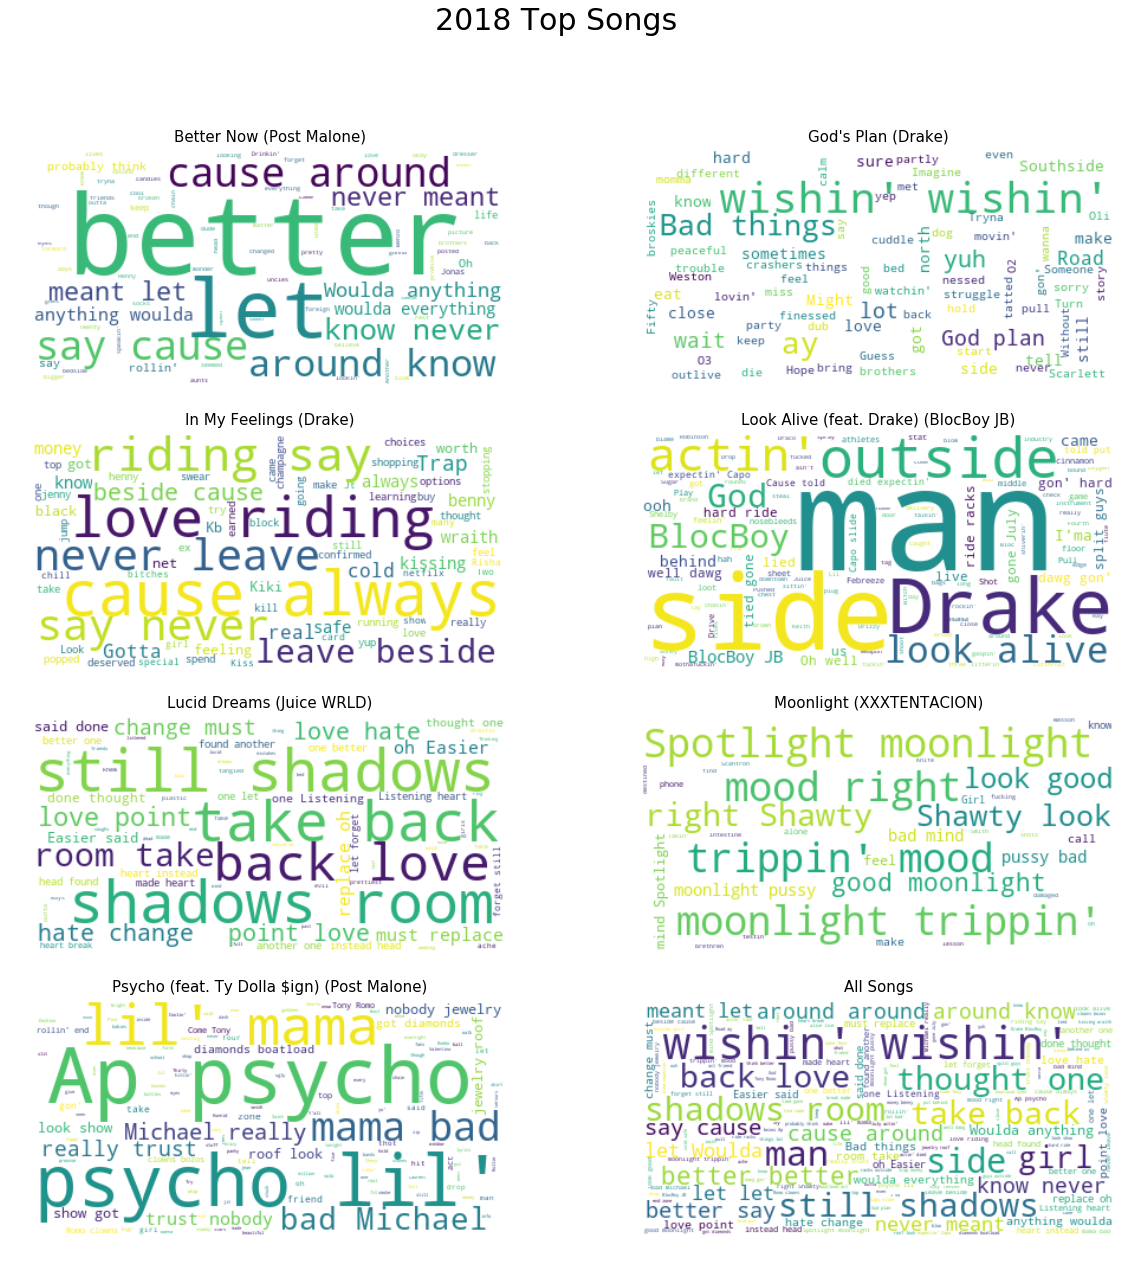

In [35]:
fig = plt.figure(figsize=(20, 20))
stopwords={"goin'", "yeah", "ya", "gave", "go", "huh", "fuck", "Nigga", "niggas", "uh", 
           "now", "see", "em", "shit", "want", "need", "ayy"}
stopwords = stopwords.union(set(STOPWORDS))
combined = ""
for ii, lyric_file in enumerate(sorted(os.listdir(LYRICS_DIR))):
    with open(os.path.join(LYRICS_DIR, lyric_file)) as fp:

        wc = WordCloud(background_color="white", max_words=2000,  stopwords=stopwords, 
                       contour_width=3, contour_color='steelblue', repeat=False)
        
        # generate word cloud
        text = fp.read()
        combined += text
        wc.generate(text)
        wc.to_file(os.path.join(OUTPUT_DIR, f"{lyric_file}.png"))
        
        ax = fig.add_subplot(4, 2, ii+1)
        ax.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        ax.set_title(lyric_file, fontsize=15, pad=10)
        
wc.generate(combined)
wc.to_file(os.path.join(OUTPUT_DIR, f"AllSongs.png"))
        
ax = fig.add_subplot(4, 2, ii+2)
ax.imshow(wc, interpolation='bilinear')
plt.axis("off")
ax.set_title('All Songs', fontsize=15, pad=10)
fig.suptitle('2018 Top Songs', fontsize=30)
plt.show()
fig.savefig(os.path.join(OUTPUT_DIR, "CombinedFigure.png"))